In [1]:
import os, sys
import glob
sys.path.append('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom')
sys.path.append('../')

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from blossom import *
from flowerpot import *

In [ ]:
organism_list = dataset_io.load_organism_dataset('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general_2d/organisms_ds0010.txt')
organism_list

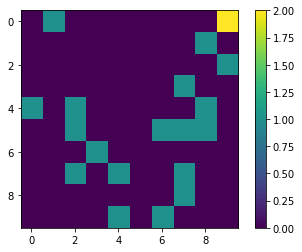

In [20]:
organism_path = '/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general_2d/organisms_ds0000.txt'
world_path = '/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general_2d/world_ds0000.txt'

import json

with open(organism_path, 'r') as f:
    organism_list = json.load(f)
with open(world_path, 'r') as f:
    world = json.load(f)
    
world_size = [10, 10]
plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

for organism in organism_list:
    if organism['alive']:
        plot[organism['position'][0]][organism['position'][1]] += 1

plt.imshow(plot)
# plt.clim(0,10)
plt.colorbar()
plt.savefig('test.png')

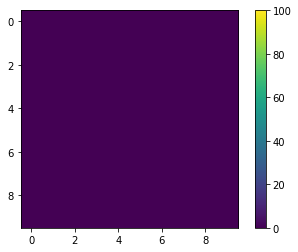

In [28]:
organism_fields = ['alive', 'old_age', 'thirst', 'hunger', 'births']
world_fields = ['water', 'food']
organism_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general_2d/organisms_ds????.txt'))
world_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general_2d/world_ds????.txt'))

time = 100

for field in organism_fields:
    for i in range(time + 1):
        plt.close('all')
        
        world_size = [10, 10]
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(organism_paths[i], 'r') as f:
            organism_list = json.load(f)
            
        for organism in organism_list:
            if field == 'alive' and organism['alive'] \
            or field == 'old_age' and organism['cause_of_death'] == 'old_age' \
            or field == 'thirst' and organism['cause_of_death'] == 'thirst' \
            or field == 'hunger' and organism['cause_of_death'] == 'hunger' \
            or field == 'births' and organism['age'] == 0:
                plot[organism['position'][0]][organism['position'][1]] += 1
        
        fig = plt.figure()
        plt.imshow(plot)
        plt.clim(0,10)
        plt.colorbar()
        plt.savefig('images/image_2d_%s_%03d.png' % (field, i))

for field in world_fields:
    for i in range(time + 1):
        plt.close('all')
        
        world_size = [10, 10]
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(world_paths[i], 'r') as f:
            world = json.load(f)

        plot = world[field]

        fig = plt.figure()
        plt.imshow(plot)
        plt.clim(0,100)
        plt.colorbar()
        plt.savefig('images/image_2d_%s_%03d.png' % (field, i))

In [29]:
import imageio

for field in (organism_fields + world_fields):
    filenames = sorted(glob.glob('images/image_2d_%s_???.png' % (field)))
    
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
        
    imageio.mimsave('%s.gif' % field, images, duration=0.5)

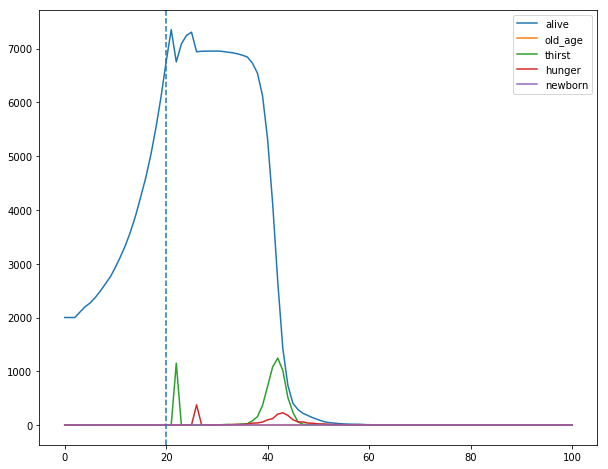

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

organism_fields = ['alive', 'old_age', 'thirst', 'hunger', 'births']
world_fields = ['water', 'food']
organism_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general_2d/organisms_ds????.txt'))
world_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general_2d/world_ds????.txt'))

time = 100

for i in range(time + 1):
    plt.close('all')
    
    fig = plt.figure(constrained_layout=True, figsize=(10,10))
    gs = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    ax00 = fig.add_subplot(gs[0, 0])
    plt.sca(ax00)

    ax10 = fig.add_subplot(gs[1, 0])
    plt.sca(ax10)

    ax11 = fig.add_subplot(gs[1, 1])
    plt.sca(ax11)

    ax20 = fig.add_subplot(gs[2, 0])
    plt.sca(ax20)

    ax21 = fig.add_subplot(gs[2, 1])
    plt.sca(ax21)

    ax22 = fig.add_subplot(gs[2, 2])
    plt.sca(ax22)

    ax01 = fig.add_subplot(gs[0, 1])
    plt.sca(ax01)

    for field in organism_fields:
    
        world_size = [10, 10]
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(organism_paths[i], 'r') as f:
            organism_list = json.load(f)
            
        for organism in organism_list:
            if field == 'alive' and organism['alive'] \
            or field == 'old_age' and organism['cause_of_death'] == 'old_age' \
            or field == 'thirst' and organism['cause_of_death'] == 'thirst' \
            or field == 'hunger' and organism['cause_of_death'] == 'hunger' \
            or field == 'births' and organism['age'] == 0:
                plot[organism['position'][0]][organism['position'][1]] += 1
                
    for field in world_fields:
        world_size = [10, 10]
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(world_paths[i], 'r') as f:
            world = json.load(f)

        plot = world[field]
        
    plt.imshow(plot)
    plt.clim(0,10)
    plt.colorbar()
        
    plt.savefig('images/image_2d_%s_%03d.png' % (field, i))

for field in world_fields:
    for i in range(time + 1):
        plt.close('all')
        
        world_size = [10, 10]
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(world_paths[i], 'r') as f:
            world = json.load(f)

        plot = world[field]

        fig = plt.figure()
        plt.imshow(plot)
        plt.clim(0,100)
        plt.colorbar()
        plt.savefig('images/image_2d_%s_%03d.png' % (field, i))